In [1]:
from src.data import DataHelper
from src.encoders import OneHotEncoder
from src.neural import Neural

**Load the MNIST train and test data**

In [2]:
X_train, y_train, X_test, y_test = DataHelper.load_and_split_data()
print(f"X_train: {X_train.shape}; y_train: {y_train.shape}; X_test: {X_test.shape}; y_test: {y_test.shape}")

X_train: (60000, 28, 28); y_train: (60000,); X_test: (10000, 28, 28); y_test: (10000,)


**Visualise the training data**

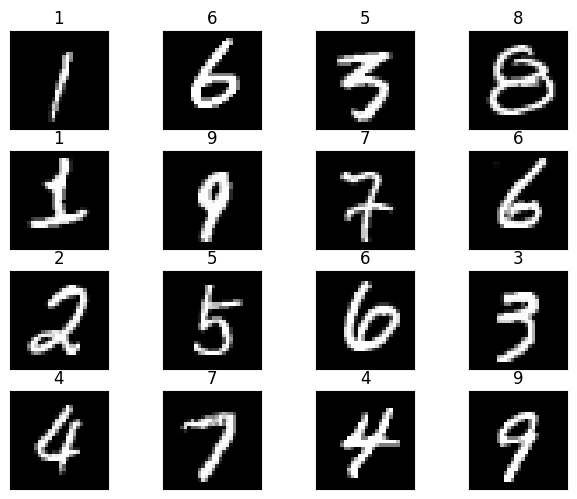

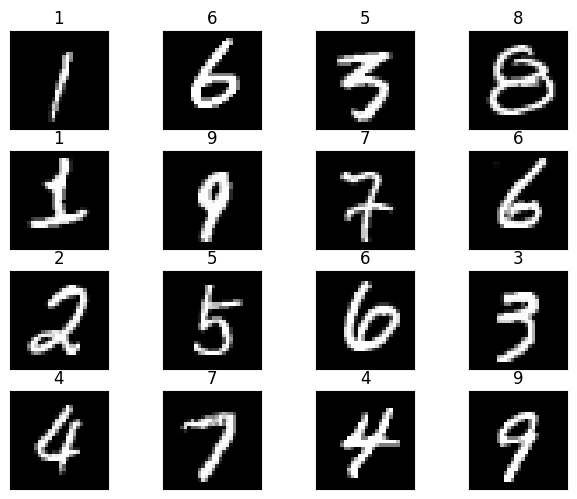

In [3]:
DataHelper.visualise(X_train, y_train)

**Pre-process the images data before neural network training**

In [4]:
X_train = DataHelper.preprocess_images(X_train)
X_test = DataHelper.preprocess_images(X_test)

**One-hot encode labels**

In [5]:
num_classes = 10
y_train_onehot = OneHotEncoder.encode(y_train, num_labels=num_classes)

**Initiate the neural network**

In [6]:
nn = Neural(input_size = X_train.shape[1], hidden1_size = 128, hidden2_size = 64, output_size = 10)

**Train the neural network**

In [7]:
max_epochs=10
progress_func=lambda epoch, train_accuracy: print(f"Epoch {epoch + 1: >2}/{max_epochs}, Accuracy training set: {train_accuracy:.4f}")

nn.train(X_train=X_train, y_train=y_train_onehot, learning_rate=0.1, epochs=max_epochs, batch_size=64, progress_func=progress_func)

Epoch  1/10, Accuracy training set: 0.5220
Epoch  2/10, Accuracy training set: 0.8881
Epoch  3/10, Accuracy training set: 0.9150
Epoch  4/10, Accuracy training set: 0.9331
Epoch  5/10, Accuracy training set: 0.9342
Epoch  6/10, Accuracy training set: 0.9404
Epoch  7/10, Accuracy training set: 0.9495
Epoch  8/10, Accuracy training set: 0.9513
Epoch  9/10, Accuracy training set: 0.9580
Epoch 10/10, Accuracy training set: 0.9538


**Check the accuracy score**

In [8]:
print(f"Training accuracy: {nn.score(X_train, y_train)}")

Training accuracy: 0.9538333333333333


**Make predictions for the test set**

In [9]:
predictions = nn.predict(X_test)
print(f"Test accuracy: {nn.score(X_test, y_test)}")
predictions

Test accuracy: 0.9463


array([7, 2, 1, ..., 4, 5, 6])